### Import importantant Libraries 

In [33]:
import pandas as pd
import numpy as np
import sklearn as sk
import scipy as sp
import bokeh as bkh
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

# All outputs are visible
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Retina resolution for the plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
# All plots contained in the notebook
%matplotlib inline

# visualization library
import seaborn as sns
sns.set( color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24}) 




### Lets acquire all the experiments to import them more conveniently

In [154]:
def print_available_cvs():
    data = "data"
    experiment_csvs = [("/data/" + f) for f in listdir(data) if isfile(join(data, f))]
    print("The current experiment list is:")
    for f in range(1,len(experiment_csvs)):
        print(str(f) + "-) " + experiment_csvs[f] )
def get_data(index):
    names = ["id","Vertex","Edge",
         'T-Tarjan','S-Tarjan',
         'T-Nuutila Original','S-Nuutila Original', 
         'T-Nuutila Version1','S-Nuutila Version1',
         'T-Nuutila Version2','S-Nuutila Version2', 
         'T-Pearson Version1','S-Pearson Version1',
         'T-Pearson Version2','S-Pearson Version2',
         'T-Pearson Version3','S-Pearson Version3']
    print("\n The file that is used to create the dataframe is : " + experiment_csvs[index][1:])
    df = pd.read_csv(experiment_csvs[index][1:],sep=',',names=names)
    return df

In [155]:
print_available_cvs()

The current experiment list is:
1-) /data/experiment_2018-07-12.19:35:55.csv
2-) /data/experiment_2018-07-12.14:34:02.csv
3-) /data/experiment_2018-07-10.22:19:31.csv
4-) /data/experiment_2018-07-12.17:52:58.csv
5-) /data/experiment_2018-07-11.21:06:31.csv
6-) /data/experiment_2018-07-12.19:27:31.csv
7-) /data/experiment_2018-07-12.19:09:53.csv
8-) /data/experiment_2018-06-28.11:09:41.csv
9-) /data/experiment_2018-06-28.21:30:23.csv
10-) /data/experiment_2018-06-29.09:26:39.csv
11-) /data/experiment_2018-07-12.14:28:42.csv
12-) /data/experiment_2018-07-03.08:34:40.csv
13-) /data/experiment_2018-07-01.12:42:11.csv


In [156]:
df = get_data(4)


 The file that is used to create the dataframe is : data/experiment_2018-07-12.17:52:58.csv


Get the latest experiment

In [157]:
df.shape
df.describe()

(21842, 17)

,id,Vertex,Edge,T-Tarjan,S-Tarjan,T-Nuutila Original,S-Nuutila Original,T-Nuutila Version1,S-Nuutila Version1,T-Nuutila Version2,S-Nuutila Version2,T-Pearson Version1,S-Pearson Version1,T-Pearson Version2,S-Pearson Version2,T-Pearson Version3,S-Pearson Version3
count,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000,21842.000000
mean,10920.500000,74.463099,2351.275158,78.724828,1.454357,1.027303,2.326972,1.110216,2.289061,0.912675,1.767747,1.051863,2.289061,0.722162,0.838607,3.080352,2.870802
std,6305.386626,14.362880,2034.723011,79.950182,0.280525,4.361230,0.448840,4.521143,0.462370,3.718956,0.336862,4.362231,0.462370,3.383671,0.201689,7.509044,0.571924
min,0.000000,50.000000,0.000000,0.062796,0.976562,0.019485,1.562500,0.016160,1.171880,0.015842,1.191410,0.018796,1.171880,0.012951,0.199219,0.027086,1.562500
25%,5460.250000,62.000000,676.000000,14.745475,1.210940,0.214520,1.937500,0.220647,1.898440,0.195641,1.472660,0.227252,1.898440,0.155930,0.699219,0.611103,2.375000
50%,10920.500000,74.000000,1803.000000,51.357900,1.445310,0.454564,2.312500,0.483742,2.273440,0.425758,1.757810,0.481656,2.273440,0.327032,0.851562,1.422770,2.867190
75%,16380.750000,87.000000,3516.000000,125.971250,1.699220,0.820137,2.718750,0.898747,2.679690,0.788898,2.058590,0.869811,2.679690,0.600219,1.003910,2.825890,3.351560
max,21841.000000,99.000000,9641.000000,723.203000,1.933590,136.458000,3.093750,169.650000,3.085940,144.037000,2.433590,142.045000,3.085940,172.560000,1.156250,168.814000,3.859380


Now we add the functions to seperate the algorithm columns, sort them according to the Vertex numbers, and plot them accordingly

In [158]:
def seperate_dataframes(df):
    df_storage_all = df[['Vertex','S-Tarjan',
                 'S-Nuutila Original', 
                 'S-Nuutila Version1',
                 'S-Nuutila Version2', 
                 'S-Pearson Version1',
                 'S-Pearson Version2',
                'S-Pearson Version3']]
    df_storage_all = df_storage_all.sort_values(by=['Vertex']);

    df_s_t = df_storage_all[['Vertex','S-Tarjan']]
    df_s_n = df_storage_all[['Vertex',
                                     'S-Nuutila Original', 
                                     'S-Nuutila Version1',
                                     'S-Nuutila Version2', ]]
    df_s_p = df_storage_all[['Vertex',
                                   'S-Pearson Version1',
                                    'S-Pearson Version2',
                                    'S-Pearson Version3']]
    bundle = [df_s_t,df_s_n,df_s_p,df_storage_all]
    return bundle

def plot_storage(df,axe):
   # plt.figure(figsize = (10,8))
    for i in range(1,len(df.columns)):
        axe.plot(df['Vertex'],df[df.columns[i]])
    axe.legend(loc='best')  
    axe.set_xlabel('Vertex')
    axe.set_ylabel('Kilobytes')
    
def plot_comparisons(bundle):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,20))
    axs = [ax1,ax2,ax3, ax4]
    for i in range(len(bundle)):
        plot_storage(bundle[i],axs[i])

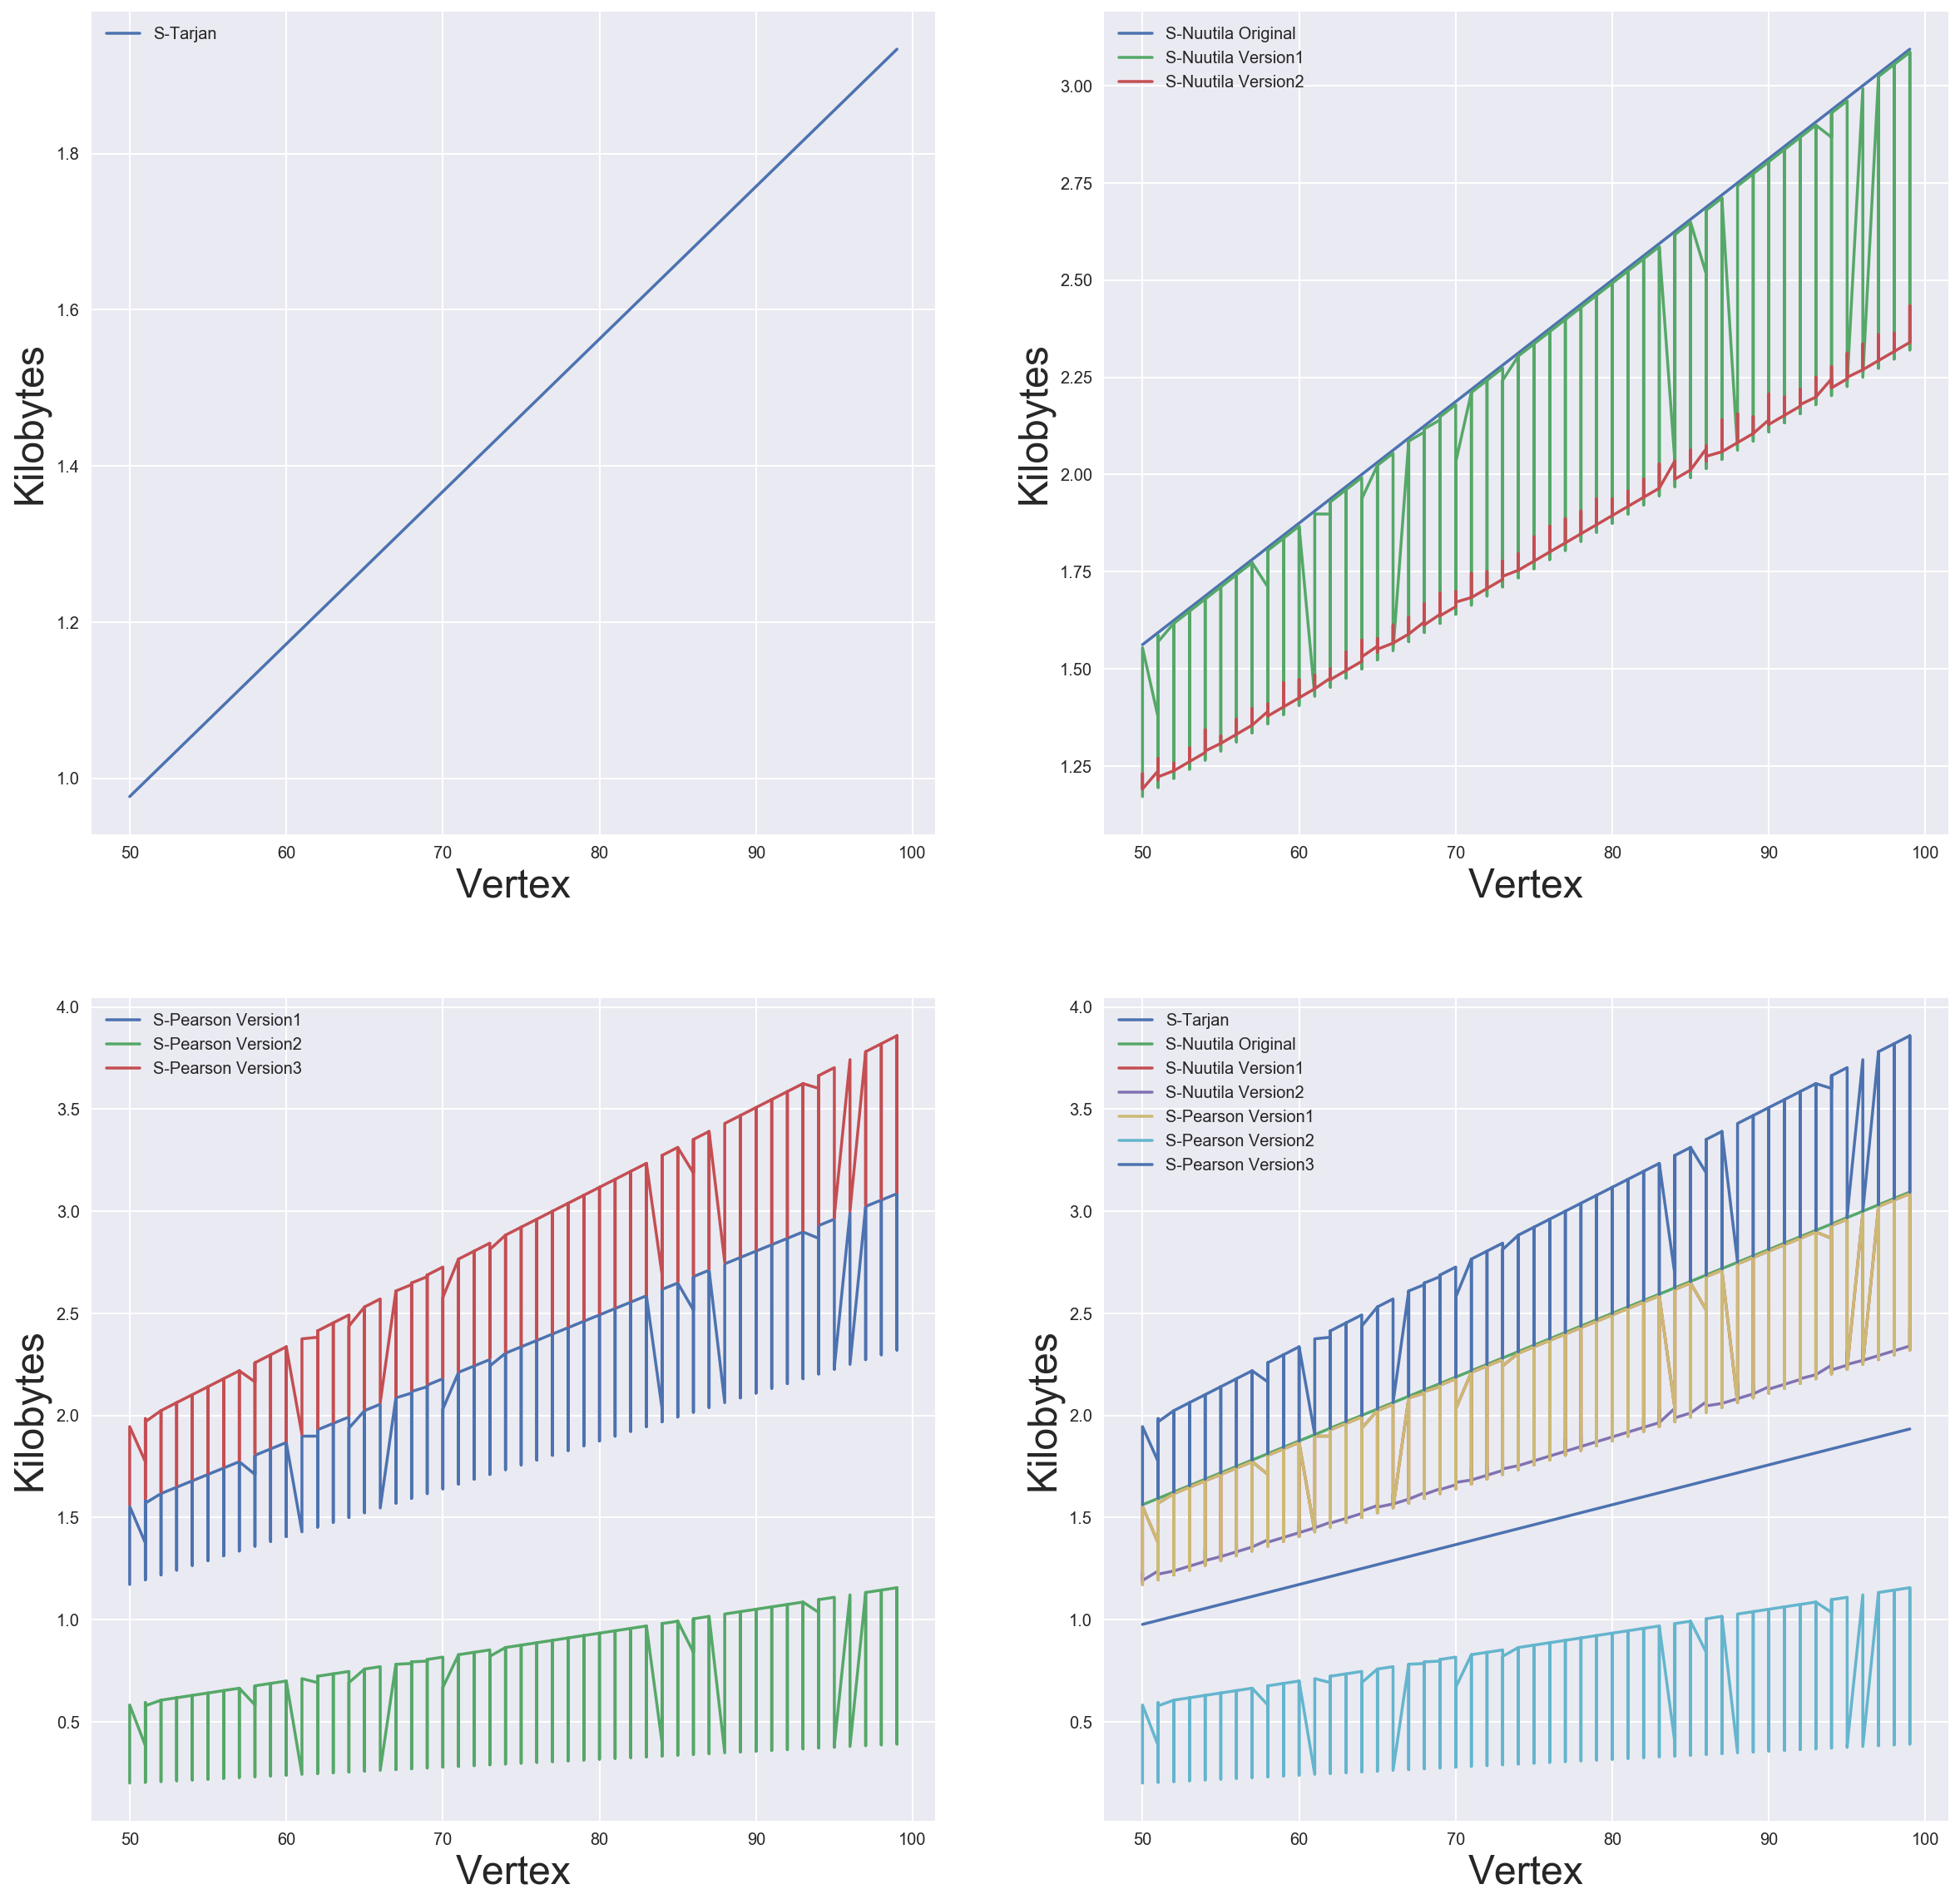

In [159]:
new_dfs = seperate_dataframes(df)
plot_comparisons(new_dfs)